## **Dataset 1**

In [ ]:
# import require libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =( 15,8) 

# read General1 dataset
df = pd.read_excel('/General2/Data2.xlsx', parse_dates=True) # path to dataset
df.head()

,DATE,YEAR,EURO
0,2019-01-01,2019,8350.00
1,2019-01-01,2019,104.27
2,2019-01-03,2019,3665.51
3,2019-01-03,2019,1241.80
4,2019-01-06,2019,284.13


In [ ]:
df.tail()

,DATE,YEAR,EURO
2846,2021-11-18,2021,28.56
2847,2021-11-22,2021,600.00
2848,2021-11-23,2021,3735.34
2849,2021-11-24,2021,14.62
2850,2021-11-29,2021,10.41


In [ ]:
df.dtypes

DATE    datetime64[ns]
YEAR             int64
EURO           float64
dtype: object

In [ ]:
# converting date column to pandas datetime column  
df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)
df.dtypes

DATE    datetime64[ns]
YEAR             int64
EURO           float64
dtype: object

In [ ]:
# setting date column as index
df.set_index('DATE', inplace=True)
df.head()

,YEAR,EURO
DATE,,
2019-01-01,2019,8350.00
2019-01-01,2019,104.27
2019-01-03,2019,3665.51
2019-01-03,2019,1241.80
2019-01-06,2019,284.13


## **Visualization**

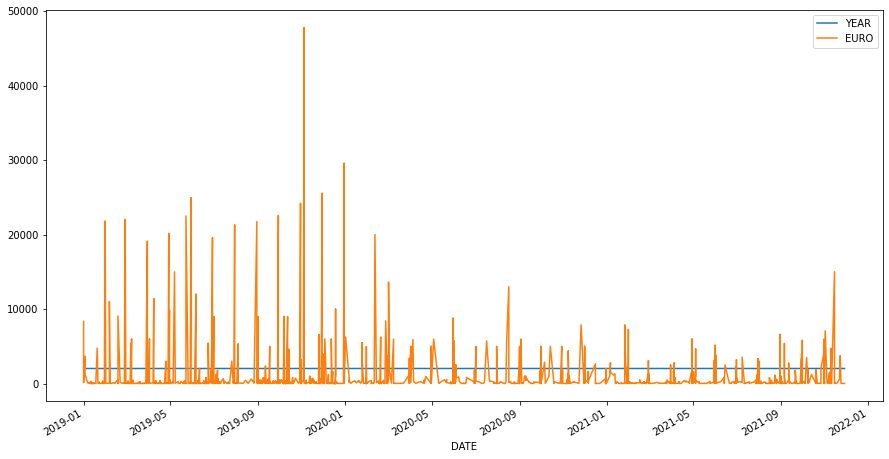

In [ ]:
df.plot()

Data looks seasonal

In [ ]:
# converting to monthly data
df['DATE'] = pd.to_datetime(df['DATE'])
df_month = df.groupby(pd.Grouper(key='DATE', freq='1M')).sum() # groupby each month
df_month.drop(['YEAR'], axis=1, inplace=True)
df_month.head()

,EURO
DATE,
2019-01-31,41964.50
2019-02-28,46968.18
2019-03-31,34524.95
2019-04-30,45741.40
2019-05-31,86749.01


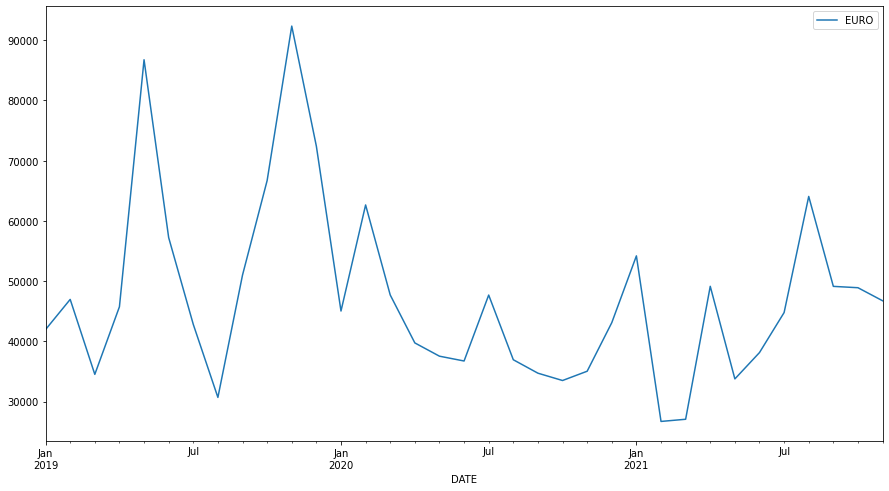

In [ ]:
df_month.plot()

<BarContainer object of 35 artists>

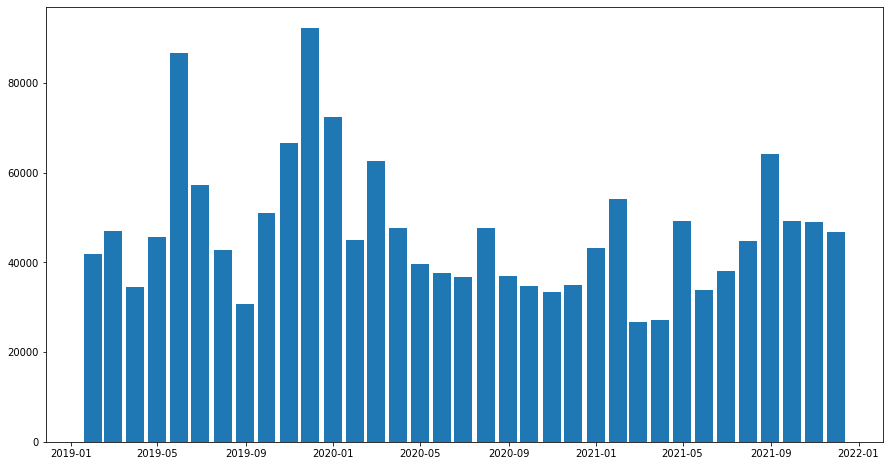

In [ ]:
# using subplot
fig, ax = plt.subplots()
  
# plotting bar graph
ax.bar(df_month['2019':].index, 
       df_month.loc['2019':, "EURO"], 
       width=25, align='center')

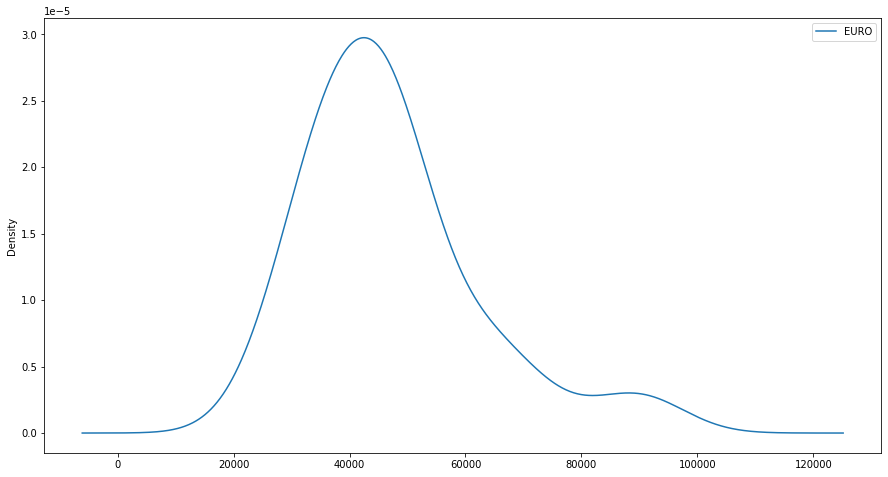

In [ ]:
df_month.plot(kind='kde')

Text(0, 0.5, 'Euro')

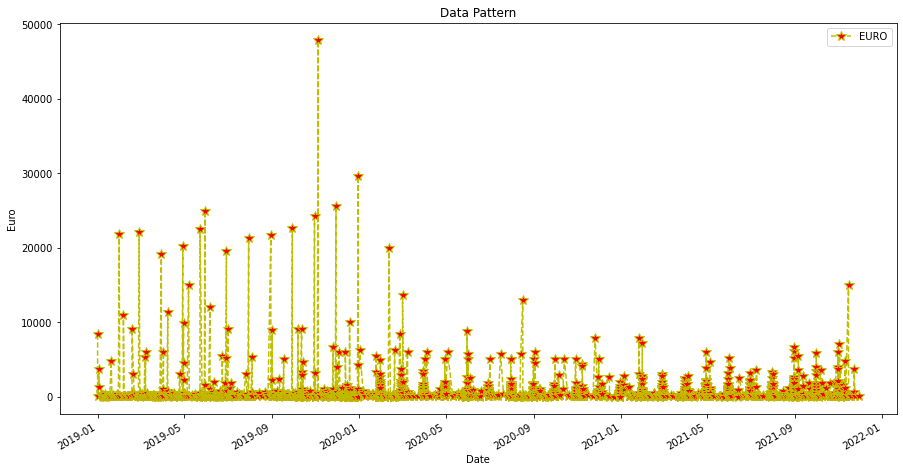

In [ ]:
df.plot(x='DATE',y='EURO',linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)
plt.title('Data Pattern')
plt.xlabel('Date')
plt.ylabel('Euro')

## **Testing for stationarity**

In [ ]:
# rolling statisics on daily level
rolmean = (df.drop(['YEAR'], axis=1)).rolling(window=365).mean()
rolstd = (df.drop(['YEAR'], axis=1)).rolling(window=365).std()

print(rolmean, rolstd)

            EURO
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
2846  561.202740
2847  562.643973
2848  572.745315
2849  572.634685
2850  572.226164

[2851 rows x 1 columns]              EURO
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
...           ...
2846  1302.083832
2847  1301.834137
2848  1312.096416
2849  1312.141891
2850  1312.294066

[2851 rows x 1 columns]


In [ ]:
# rolling statisics on monthly level
rolmeanM = df_month.rolling(window=12).mean()

rolstdM = df_month.rolling(window=12).std()

print(rolmeanM, rolstdM)

                    EURO
DATE                    
2019-01-31           NaN
2019-02-28           NaN
2019-03-31           NaN
2019-04-30           NaN
2019-05-31           NaN
2019-06-30           NaN
2019-07-31           NaN
2019-08-31           NaN
2019-09-30           NaN
2019-10-31           NaN
2019-11-30           NaN
2019-12-31  55761.011667
2020-01-31  56017.174167
2020-02-29  57323.668333
2020-03-31  58421.661667
2020-04-30  57921.810833
2020-05-31  53821.178333
2020-06-30  52113.515000
2020-07-31  52519.110833
2020-08-31  53040.045833
2020-09-30  51682.912500
2020-10-31  48916.914167
2020-11-30  44142.510000
2020-12-31  41701.675833
2021-01-31  42464.589167
2021-02-28  39469.916667
2021-03-31  37750.670833
2021-04-30  38533.798333
2021-05-31  38219.364167
2021-06-30  38336.005833
2021-07-31  38093.892500
2021-08-31  40353.084167
2021-09-30  41554.098333
2021-10-31  42837.665833
2021-11-30  43812.560000                     EURO
DATE                    
2019-01-31           NaN


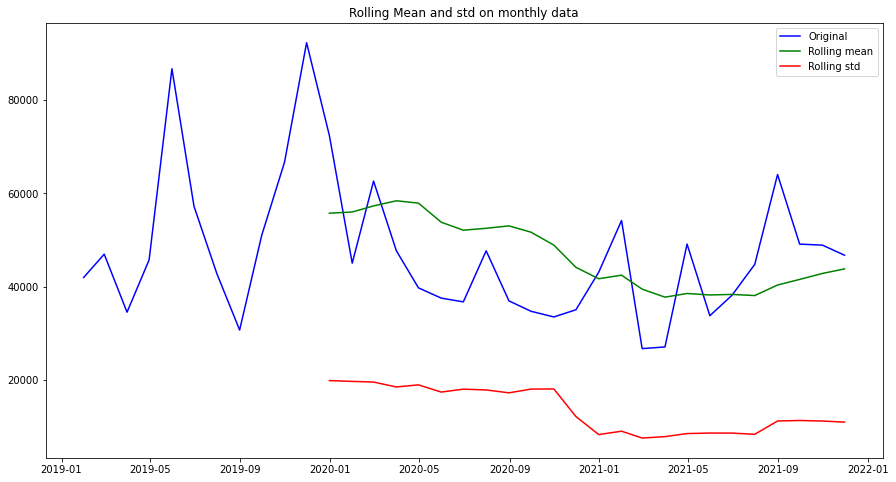

In [ ]:
# plot rolling stats
orig = plt.plot(df_month, color = 'blue', label = 'Original')
mean = plt.plot(rolmeanM, color = 'green', label = 'Rolling mean')
std = plt.plot( rolstdM, color = 'red', label = 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and std on monthly data')
plt.show(block=False)

In [ ]:
# Dicket fuller on daily level

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['EURO'], autolag='AIC')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(column):
    result=adfuller(column)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['EURO'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Test Statistic : -51.748835383967375
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 2850
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
# Dicket fuller on monthly level

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df_month['EURO'], autolag='AIC')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(column):
    result=adfuller(column)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df_month['EURO'])

ADF Test Statistic : -3.5866696876200885
p-value : 0.006021048592201126
#Lags Used : 0
Number of Observations Used : 34
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Data is stationary, continue with ARIMA & SARIMA model creation

## **Seasonal diffrencing to find value of p d q for ARIMA model**

In [ ]:
# Sessonal differencing

df_month['Seasonal_First_Difference']=df_month['EURO']-df_month['EURO'].shift(12)
df_month

,EURO,Seasonal_First_Difference,forecast
DATE,,,
2019-01-31,41964.50,NaN,NaN
2019-02-28,46968.18,NaN,NaN
2019-03-31,34524.95,NaN,NaN
2019-04-30,45741.40,NaN,NaN
2019-05-31,86749.01,NaN,NaN
2019-06-30,57233.50,NaN,NaN
2019-07-31,42820.09,NaN,NaN
2019-08-31,30698.27,NaN,NaN
2019-09-30,51004.16,NaN,NaN


In [ ]:
adfuller_test(df_month['Seasonal_First_Difference'].dropna())

ADF Test Statistic : -2.6777068422703394
p-value : 0.07797604016256168
#Lags Used : 0
Number of Observations Used : 22
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


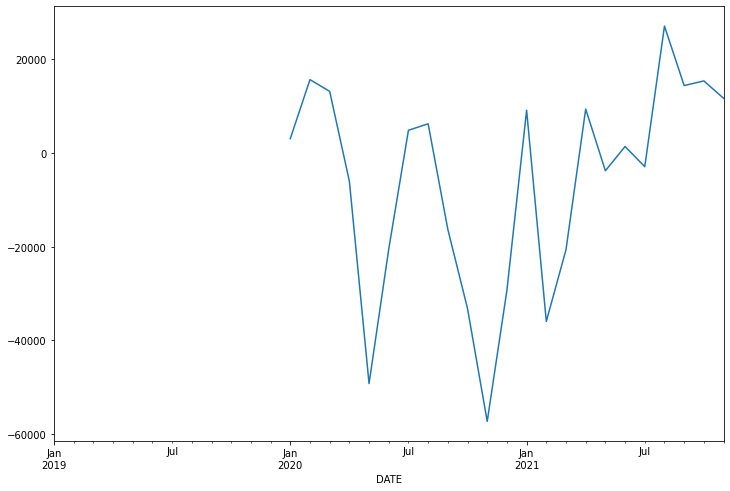

In [ ]:
df_month['Seasonal_First_Difference'].plot(figsize=(12,8))

## **Auto Regressive Model**

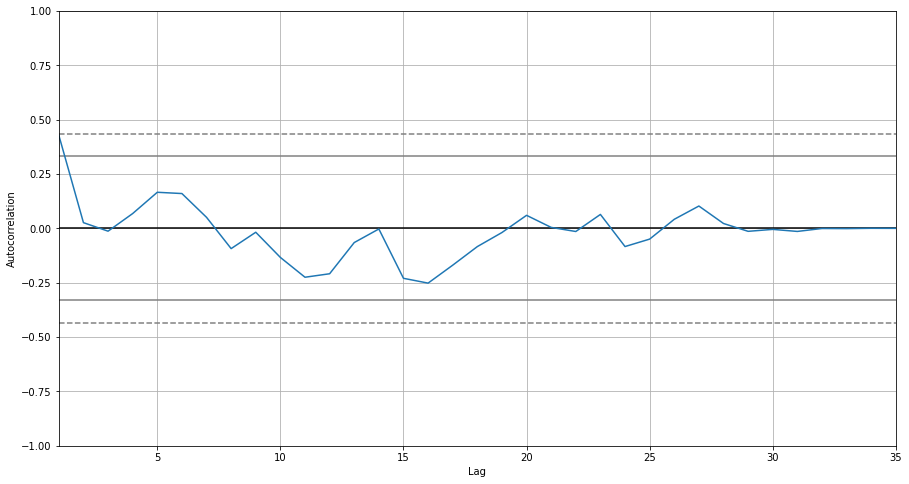

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_month['EURO'])
plt.show()

## **Autocorrelation and Partial Autocorrelation**

Identification of an AR model is often best done with the PACF.
-For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.


Identification of an MA model is often best done with the ACF rather than the PACF.
-For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q = AR model lags, differencing , MA lags

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


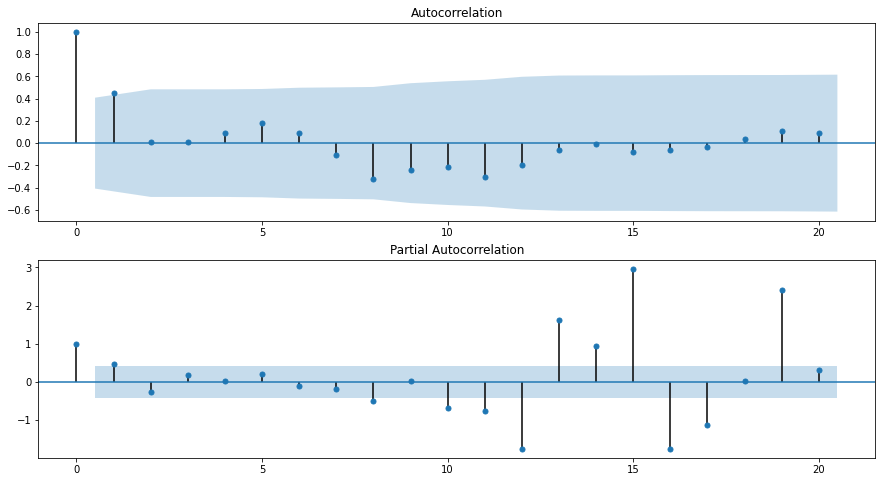

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_month['Seasonal_First_Difference'].dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_month['Seasonal_First_Difference'].dropna(),lags=20,ax=ax2)

From here select p = 1, q = 0  or 1, d = 1

## **Arima Model**

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df_month['EURO'],order=(1,1,0)) # p d q
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.EURO   No. Observations:                   34
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -377.303
Method:                       css-mle   S.D. of innovations          15961.000
Date:                Tue, 11 Jan 2022   AIC                            760.606
Time:                        10:04:14   BIC                            765.185
Sample:                    02-28-2019   HQIC                           762.167
                         - 11-30-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          140.5509   2405.715      0.058      0.954   -4574.564    4855.666
ar.L1.D.EURO    -0.1420      0.167     -0.848      0.402      -0.470       0.186
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.0408           +0.0000j            7.0408            0.5000
-----------------------------------------------------------------------------
"""

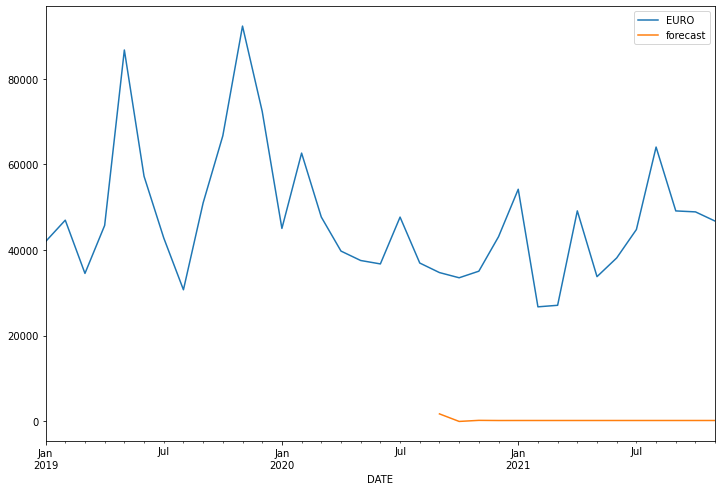

In [ ]:
df_month['forecast']=model_fit.predict(start=20,end=90,dynamic=True)
df_month[['EURO','forecast']].plot()

Since Arima is for  non-seasonal data it doesn't work well

## **Seasonal Arimax**

In [ ]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df_month['EURO'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

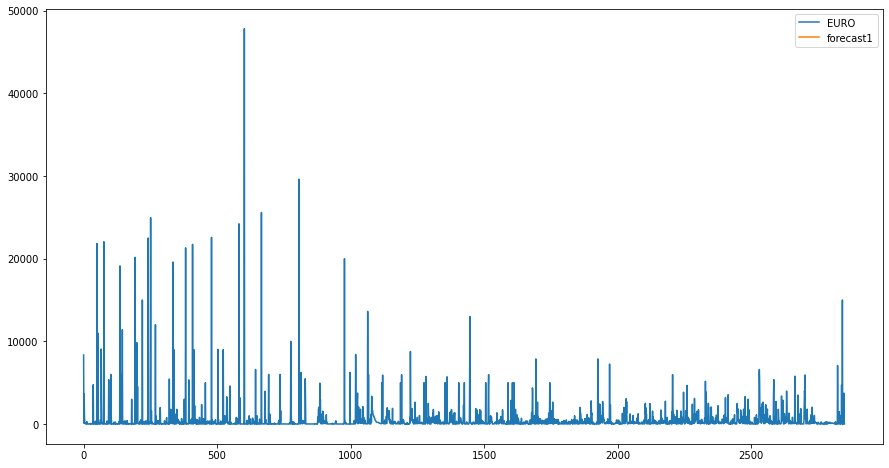

In [ ]:
df['forecast1']=results.predict(start=20,end=90,dynamic=True)
df[['EURO','forecast1']].plot()

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_month.index[-1]+ DateOffset(months=x)for x in range(0,14)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_month.columns)

In [ ]:
future_datest_df.tail()

,EURO,forecast
2022-08-30,NaN,NaN
2022-09-30,NaN,NaN
2022-10-30,NaN,NaN
2022-11-30,NaN,NaN
2022-12-30,NaN,NaN


In [ ]:
future_df=pd.concat([df_month,future_datest_df])

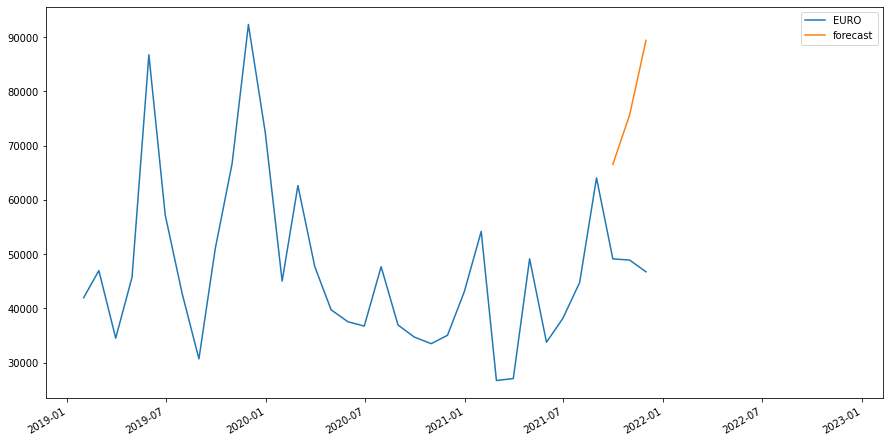

In [ ]:
future_df['forecast'] = results.predict(start = 32, end = 120, dynamic= True)  
future_df[['EURO', 'forecast']].plot() 

In [ ]:
future_df

,EURO,forecast
2019-01-31,41964.50,NaN
2019-02-28,46968.18,NaN
2019-03-31,34524.95,NaN
2019-04-30,45741.40,NaN
2019-05-31,86749.01,NaN
2019-06-30,57233.50,NaN
2019-07-31,42820.09,NaN
2019-08-31,30698.27,NaN
2019-09-30,51004.16,NaN
2019-10-31,66695.24,NaN


## **Test Prediction**

In [ ]:
print("Prediction on March 2022", future_df.loc['2022-10-30'])


Prediction on March 2022 EURO       NaN
forecast   NaN
Name: 2022-10-30 00:00:00, dtype: float64


In [ ]:
future_df.columns

Index(['EURO', 'forecast'], dtype='object')

In [ ]:
future_df.index.rename('DATE', inplace=True)

In [ ]:
future_df = future_df.reset_index()

In [ ]:
future_df

,DATE,EURO,forecast
0,2019-01-31,41964.50,NaN
1,2019-02-28,46968.18,NaN
2,2019-03-31,34524.95,NaN
3,2019-04-30,45741.40,NaN
4,2019-05-31,86749.01,NaN
5,2019-06-30,57233.50,NaN
6,2019-07-31,42820.09,NaN
7,2019-08-31,30698.27,NaN
8,2019-09-30,51004.16,NaN
9,2019-10-31,66695.24,NaN


In [ ]:
df_month.to_csv('Monthly_Euro2.csv')